## Tranformation Of Featuers:

#### Why Transformation of feature are Required?

* There are many differnt values in dataset which we need to minimaze it's range other wise model will be unfit, at the end of the moment we need to check accuracy of the model, ROC_AUC_Score for that we are using Feature trasnsformation.
* ]In the dataset there are many intgers or floating numbers which we can say that every points has some vectors & Direction also impages has 0-255 pixels, so for that we need to transform all values into Minima error. 

1. Linear Regression --- Gradient Descent --- Global Minima
2. Algorithms like KNN, KMean, Hierarichal Clustering -- Eucledian Distance.

### Deep Learning Techniques:

* Standardization : where median point is 0 and standard deviation will be 1.

* scaling: 1. ANN--> Global Minima, Gradient
           2. CNN
           3. RNN
           


### Types Of Transformation:

1. Noramlization 
2. Scaling to Minimum and Maximum Values
3. Scaling to Median and Quantiles.
4. Guassian Transformaiton
5. Logarithmic Transformation
6. Reciprocal Transformation.
7. Square Root Transformation
8. Expontial Transformation
9. Box Cox Transformation.

### Staandardization

#### Why Standardiazation?

* Standardization comes into picture when features of input dataset have ;large differences between their ranges, or simply when they are measured in different measurement units (e.g. Poundss, Meter, Miles, Kg, Centemeter etc.)

* We try to bring all the variables or features to similar scale. Standardization means centering the variable at 0. 
        z = (x - x_mean)/std.

In [1]:
import pandas as pd
df = pd.read_csv("C:\\Users\\amita\\Downloads\\Krish Naik\\feature engnieering\\titanic_train.csv",
                usecols=['Pclass', 'Age', 'Fare', 'Survived'])
df.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [2]:
# Filling the nan values in "Age" column:

df['Age'].fillna(df.Age.median(), inplace=True)

In [3]:
# Check the null values in "Age" feature, if tehre is any! after fillna with median values.

df.isnull().sum()

Survived    0
Pclass      0
Age         0
Fare        0
dtype: int64

###### here, we divide our fetures into dependant and independent values. in this datset "Survived" ccolumn is our dependent value. 

In [4]:
# Independent feature and dependent feature:

X = df.iloc[:, 1:]
y = df.iloc[:, 0]

In [5]:
# check x values which are independent features:
# [without "Survived" feature]

X

,Pclass,Age,Fare
0,3,22.0,7.2500
1,1,38.0,71.2833
2,3,26.0,7.9250
3,1,35.0,53.1000
4,3,35.0,8.0500
...,...,...,...
886,2,27.0,13.0000
887,1,19.0,30.0000
888,3,28.0,23.4500
889,1,26.0,30.0000


In [6]:
# Also check dependent feature which is "Survoved" column:

y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

###### next sterp will be transform the bvalues of each featuers. for that we need to split the data into train & test set.


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [8]:
X_train

,Pclass,Age,Fare
6,1,54.0,51.8625
718,3,28.0,15.5000
685,2,25.0,41.5792
73,3,26.0,14.4542
882,3,22.0,10.5167
...,...,...,...
106,3,21.0,7.6500
270,1,28.0,31.0000
860,3,41.0,14.1083
435,1,14.0,120.0000


In [9]:
X_test

,Pclass,Age,Fare
709,3,28.0,15.2458
439,2,31.0,10.5000
840,3,20.0,7.9250
720,2,6.0,33.0000
39,3,14.0,11.2417
...,...,...,...
715,3,19.0,7.6500
525,3,40.5,7.7500
381,3,1.0,15.7417
140,3,28.0,15.2458


In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [12]:
X_train_scaled

array([[-1.62580285,  1.91349292,  0.38784185],
       [ 0.80576177, -0.09452019, -0.31908053],
       [-0.41002054, -0.32621401,  0.18792449],
       ...,
       [ 0.80576177,  0.90948636, -0.34613654],
       [-1.62580285, -1.17575802,  1.71250117],
       [-1.62580285, -0.63513911,  0.8821286 ]])

In [13]:
# now, like that just for the test dataset:

X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[ 0.80576177, -0.09452019, -0.32402243],
       [-0.41002054,  0.13717363, -0.4162854 ],
       [ 0.80576177, -0.71237038, -0.46634591],
       [-0.41002054, -1.79360821,  0.0211365 ],
       [ 0.80576177, -1.17575802, -0.40186603],
       [-1.62580285, -0.24898274,  0.91250512],
       [ 0.80576177, -0.09452019, -0.46974808],
       [ 0.80576177, -1.02129548, -0.2704781 ],
       [ 0.80576177, -1.02129548, -0.46974808],
       [-1.62580285, -0.78960166, -0.10944269],
       [-1.62580285,  0.60056127,  0.41190006],
       [ 0.80576177,  1.14118018, -0.46391578],
       [ 0.80576177, -0.09452019, -0.12531819],
       [ 0.80576177,  0.05994235, -0.47995459],
       [-0.41002054,  0.52332999, -0.36768297],
       [-1.62580285, -1.02129548,  0.14555873],
       [-1.62580285,  0.98671764,  0.40128918],
       [ 0.80576177, -0.09452019, -0.46820835],
       [-0.41002054, -0.17175147, -0.36768297],
       [-1.62580285,  1.372874  ,  0.39051499],
       [ 0.80576177, -0.40344529, -0.466

## Model Building:

* we will do the transformation on "Logistic Regression":
* 'fit()' for training and predict for test.

### "Logistic Regression":

In [14]:
from sklearn.linear_model import LogisticRegression
classification = LogisticRegression()

In [15]:
classification.fit(X_train_scaled, y_train)

LogisticRegression()

In [16]:
classification.predict(X_test_scaled)

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

## Standardization:

In [20]:
from sklearn import preprocessing

In [21]:
Standardisation = preprocessing.StandardScaler()

X_after_Standardisation = Standardisation.fit_transform(X)
print("\n after Standardization: \n", X_after_Standardisation)


 after Standardization: 
 [[ 0.82737724 -0.56573646 -0.50244517]
 [-1.56610693  0.66386103  0.78684529]
 [ 0.82737724 -0.25833709 -0.48885426]
 ...
 [ 0.82737724 -0.1046374  -0.17626324]
 [-1.56610693 -0.25833709 -0.04438104]
 [ 0.82737724  0.20276197 -0.49237783]]


In [22]:
df.describe()

,Survived,Pclass,Age,Fare
count,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,32.204208
std,0.486592,0.836071,13.019697,49.693429
min,0.000000,1.000000,0.420000,0.000000
25%,0.000000,2.000000,22.000000,7.910400
50%,0.000000,3.000000,28.000000,14.454200
75%,1.000000,3.000000,35.000000,31.000000
max,1.000000,3.000000,80.000000,512.329200


In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([216.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 184.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 491.]),
 array([-1.56610693, -1.44643272, -1.32675851, -1.2070843 , -1.08741009,
        -0.96773588, -0.84806167, -0.72838747, -0.60871326, -0.48903905,
        -0.36936484, -0.24969063, -0.13001642, -0.01034222,  0.10933199,
         0.2290062 ,  0.34868041,  0.46835462,  0.58802883,  0.70770304,
         0.82737724]),
 <BarContainer object of 20 artists>)

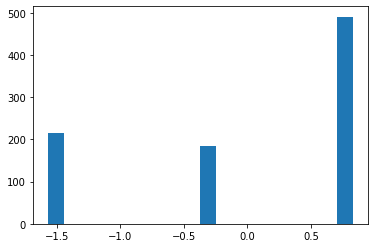

In [31]:
# hist plot for "Survived" feature:

plt.hist(X_after_Standardisation[:,0],bins=20)

(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([-2.22415608, -1.91837055, -1.61258503, -1.3067995 , -1.00101397,
        -0.69522845, -0.38944292, -0.08365739,  0.22212813,  0.52791366,
         0.83369919,  1.13948471,  1.44527024,  1.75105577,  2.05684129,
         2.36262682,  2.66841235,  2.97419787,  3.2799834 ,  3.58576892,
         3.89155445]),
 <BarContainer object of 20 artists>)

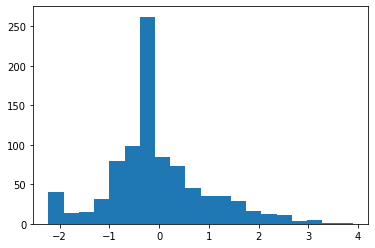

In [32]:
# HIstogram plot for "Pclass":

plt.hist(X_after_Standardisation[:,1],bins=20)

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([-0.64842165, -0.13264224,  0.38313716,  0.89891657,  1.41469598,
         1.93047539,  2.4462548 ,  2.96203421,  3.47781362,  3.99359303,
         4.50937244,  5.02515184,  5.54093125,  6.05671066,  6.57249007,
         7.08826948,  7.60404889,  8.1198283 ,  8.63560771,  9.15138712,
         9.66716653]),
 <BarContainer object of 20 artists>)

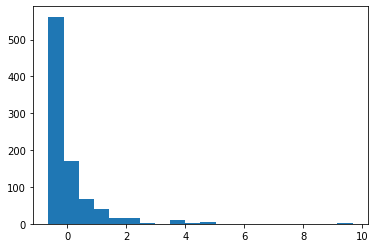

In [33]:
# histogram plot for "Age"

plt.hist(X_after_Standardisation[:,2],bins=20)

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  25.61646,  51.23292,  76.84938, 102.46584, 128.0823 ,
        153.69876, 179.31522, 204.93168, 230.54814, 256.1646 , 281.78106,
        307.39752, 333.01398, 358.63044, 384.2469 , 409.86336, 435.47982,
        461.09628, 486.71274, 512.3292 ]),
 <BarContainer object of 20 artists>)

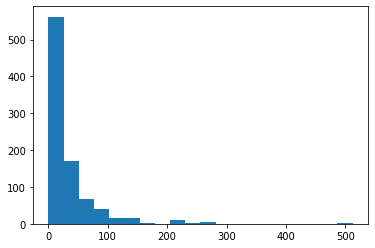

In [38]:
# Histolgram plot for "Fare":

plt.hist(df["Fare"],bins=20)

## Min-Malx Scaling(CNN) -- Deep Learning Techniques:

* Min-Max Scaling scales type values between 0 to 1.
        X_scaled = (X - X.min / (X.max - X,min))

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [46]:
from sklearn.preprocessing import MinMaxScaler

In [42]:
min_max = MinMaxScaler()
df_minmax = pd.DataFrame(min_max.fit_transform(X_train))
df_minmax.head()

,0,1,2
0,0.0,0.673285,0.101229
1,1.0,0.346569,0.030254
2,0.5,0.308872,0.081157
3,1.0,0.321438,0.028213
4,1.0,0.271174,0.020527


In [43]:
import seaborn as sns

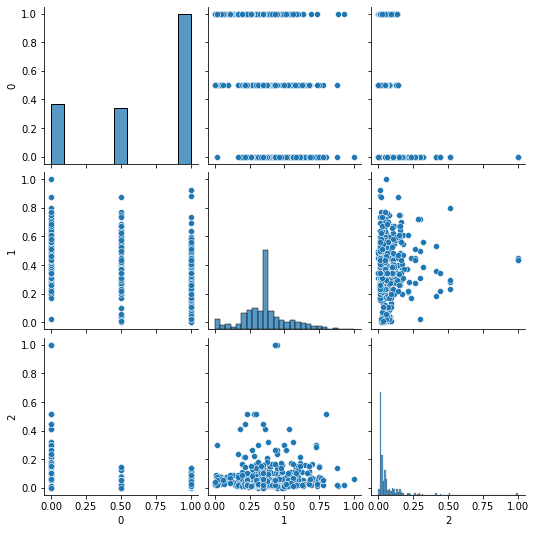

In [44]:
sns.pairplot(df_minmax)

(array([135.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 125.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 336.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

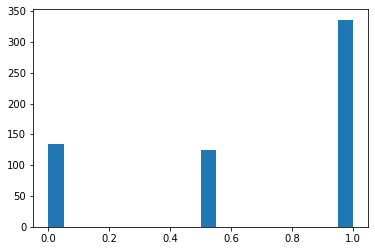

In [48]:
# hIstogram plot for "Pclass":

plt.hist(df_minmax[0], bins=20)

(array([ 29.,   9.,   9.,  23.,  50.,  63., 180.,  56.,  50.,  25.,  24.,
         27.,  16.,  15.,  10.,   5.,   0.,   3.,   1.,   1.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

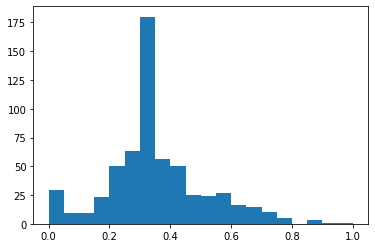

In [50]:
# histogram plot for "Age"

plt.hist(df_minmax[1], bins=20)

(array([384., 106.,  51.,  24.,   8.,   9.,   2.,   0.,   5.,   0.,   4.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

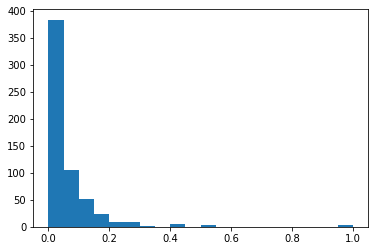

In [52]:
# hist plot for "Fare"

plt.hist(df_minmax[2], bins=20)

## Robust Scaler:

* Robust Scaler are robust to Outliers. It is used to scale the featuer to median and quantile Scaling using median and quantile consists of substracting by the interquantile difference.
*  The interquantile difference is the difference between the 75th and 25th quantile.
        IQR = 75th quantile - 25th quantile
        
        X_scales = (X - X.median) / IQR


In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [54]:
from sklearn.preprocessing import RobustScaler

In [55]:
Scaler = RobustScaler()
df_robust = pd.DataFrame(Scaler.fit_transform(X_train))
df_robust.head()

,0,1,2
0,-2.0,2.000000,1.602069
1,0.0,0.000000,0.044788
2,-1.0,-0.230769,1.161670
3,0.0,-0.153846,0.000000
4,0.0,-0.461538,-0.168630


In [56]:
# let's check with X_test:

Scaler.transform(X_test)

array([[ 0.00000000e+00,  0.00000000e+00,  3.39014989e-02],
       [-1.00000000e+00,  2.30769231e-01, -1.69344754e-01],
       [ 0.00000000e+00, -6.15384615e-01, -2.79623126e-01],
       [-1.00000000e+00, -1.69230769e+00,  7.94252677e-01],
       [ 0.00000000e+00, -1.07692308e+00, -1.37580300e-01],
       [-2.00000000e+00, -1.53846154e-01,  2.75785011e+00],
       [ 0.00000000e+00,  0.00000000e+00, -2.87117773e-01],
       [ 0.00000000e+00, -9.23076923e-01,  1.51854390e-01],
       [ 0.00000000e+00, -9.23076923e-01, -2.87117773e-01],
       [-2.00000000e+00, -6.92307692e-01,  5.06599572e-01],
       [-2.00000000e+00,  6.92307692e-01,  1.65506638e+00],
       [ 0.00000000e+00,  1.23076923e+00, -2.74269807e-01],
       [ 0.00000000e+00,  0.00000000e+00,  4.71627409e-01],
       [ 0.00000000e+00,  1.53846154e-01, -3.09601713e-01],
       [-1.00000000e+00,  6.15384615e-01, -6.22783726e-02],
       [-2.00000000e+00, -9.23076923e-01,  1.06834261e+00],
       [-2.00000000e+00,  1.07692308e+00

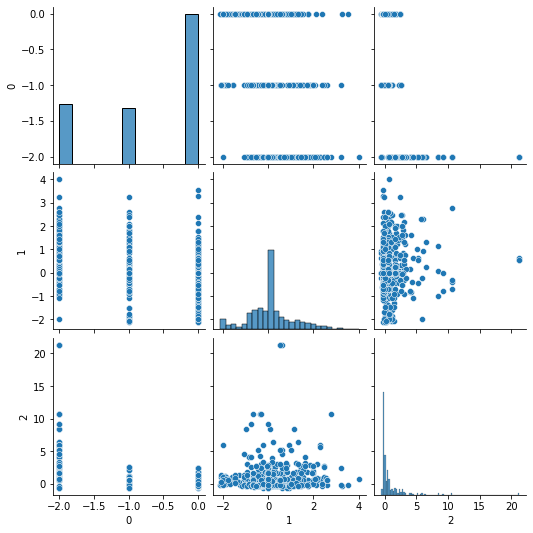

In [57]:
sns.pairplot(df_robust)

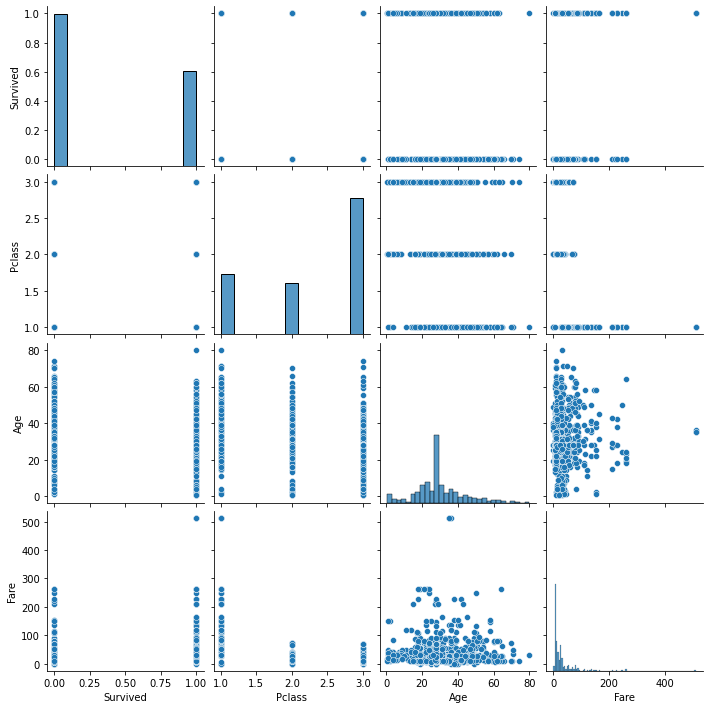

In [58]:
sns.pairplot(df)

(array([135.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 125.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 336.]),
 array([-2. , -1.9, -1.8, -1.7, -1.6, -1.5, -1.4, -1.3, -1.2, -1.1, -1. ,
        -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ]),
 <BarContainer object of 20 artists>)

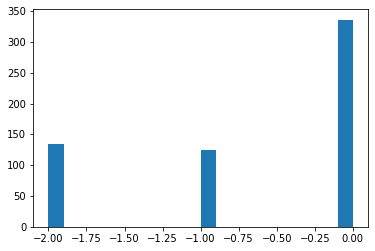

In [60]:
# plot for "Pclass"

plt.hist(df_robust[0], bins=20)

(array([ 29.,   9.,   9.,  23.,  50.,  63., 180.,  56.,  50.,  25.,  24.,
         27.,  16.,  15.,  10.,   5.,   0.,   3.,   1.,   1.]),
 array([-2.12153846, -1.81546154, -1.50938462, -1.20330769, -0.89723077,
        -0.59115385, -0.28507692,  0.021     ,  0.32707692,  0.63315385,
         0.93923077,  1.24530769,  1.55138462,  1.85746154,  2.16353846,
         2.46961538,  2.77569231,  3.08176923,  3.38784615,  3.69392308,
         4.        ]),
 <BarContainer object of 20 artists>)

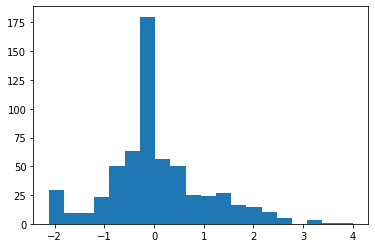

In [61]:
# plot for "Age":

plt.hist(df_robust[1], bins=20)

(array([384., 106.,  51.,  24.,   8.,   9.,   2.,   0.,   5.,   0.,   4.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([-0.61902355,  0.47804111,  1.57510578,  2.67217045,  3.76923512,
         4.86629979,  5.96336445,  7.06042912,  8.15749379,  9.25455846,
        10.35162313, 11.44868779, 12.54575246, 13.64281713, 14.7398818 ,
        15.83694647, 16.93401113, 18.0310758 , 19.12814047, 20.22520514,
        21.32226981]),
 <BarContainer object of 20 artists>)

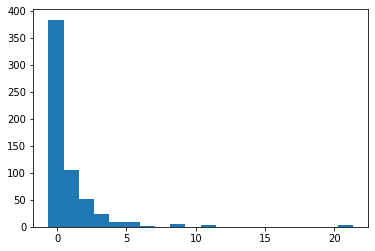

In [62]:
# plot for "Fare"

plt.hist(df_robust[2], bins=20)

## Guassian Transformation:

Some machine learning algorithms like logistic regression assume that the feature are normally distributed: - Accuracy, - Performance.

* Logarithmic transformation
* Reciprocal transformation
* Square root transformation
* Exponential transformation (more general, you can use any exponent)
* Box Cox transformation

In [63]:
df = pd.read_csv("C:\\Users\\amita\\Downloads\\Krish Naik\\feature engnieering\\titanic_train.csv",
                usecols=['Age', 'Fare', 'Survived'])
df.head()           

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [64]:
# filling the Nan values with median.

df['Age'] = df['Age'].fillna(df['Age'].median())

In [65]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [67]:
import matplotlib.pyplot as plt
import scipy.stats as stat
import pylab

###### If ypu want to check whether feature is guassian or normal distributed use Q-Q plot.

* below plots will saw us histogram plot with Q-Q plot.
* Q-Q plot will be right side.
* if line will be staright(means like linear line- slanting) we will consider that transformation for our featuer engineering and use that method for the further process.
* here, when Q-Q plot line will cover most of the popints nearly we will consider that method. 

In [69]:
def plot_data(df, feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1, 2, 1)
    df[feature].hist()
    plt.subplot(1, 2, 2)
    stat.probplot(df[feature], dist='norm', plot=pylab)
    plt.show()

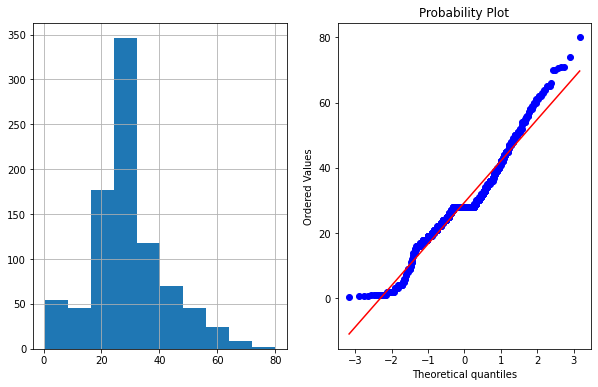

In [70]:
plot_data(df, 'Age')

* as we can see Q-Q plot is covering most of the points so we can cosider this method. 
* but let's check with another method as well.

#### Logarithmic Transformation:

In [71]:
import numpy as np

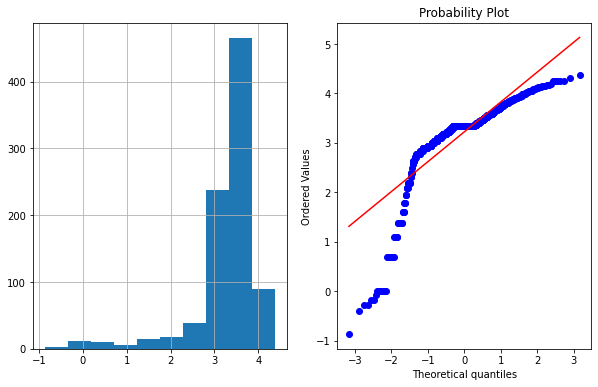

In [72]:
df["Age_log"] = np.log(df['Age'])
plot_data(df, 'Age_log')

* This "Logarithmatic" Transformation we can not consider.

#### Reciprocal Transformation:

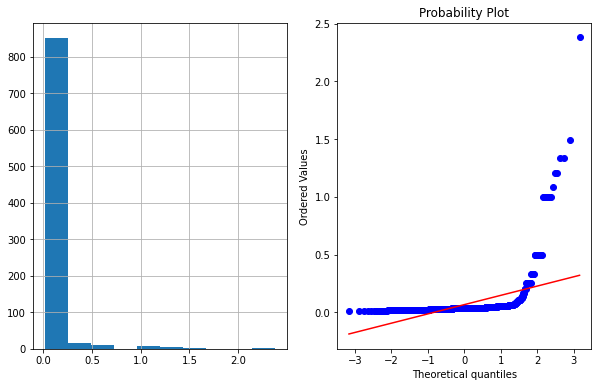

In [75]:


df['Age_reciprocal'] = 1/df.Age
plot_data(df, "Age_reciprocal")

* "Reciprocal" is also not consider.

#### Square Root Transformation:

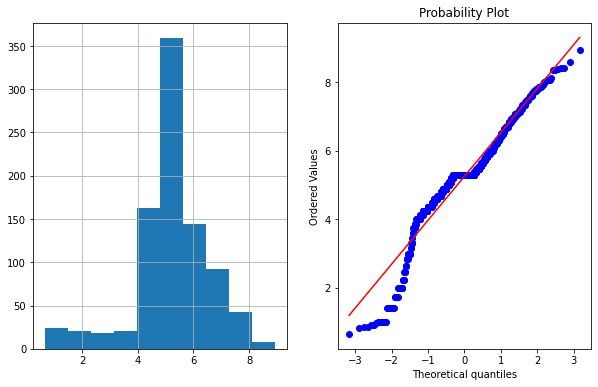

In [76]:
df['Age_square'] = df.Age ** (1/2)
plot_data(df, "Age_square")

* we can cosider but let's check another transformation.

#### BoxCox Transformation:

The Box-Cox transformation is defined as:
      T(Y)=(Y exp(λ)−1)/λ
      
Where Y is the response variable and λ is the transformation parameter. λ varies from -5 to 5. 
* In the transformation, all values of λ are considered and the optimal value for a given variable is selected.



In [77]:
df["Age_Boxcox"], parameters = stat.boxcox(df['Age'])

In [78]:
print(parameters)

0.7964531473656952


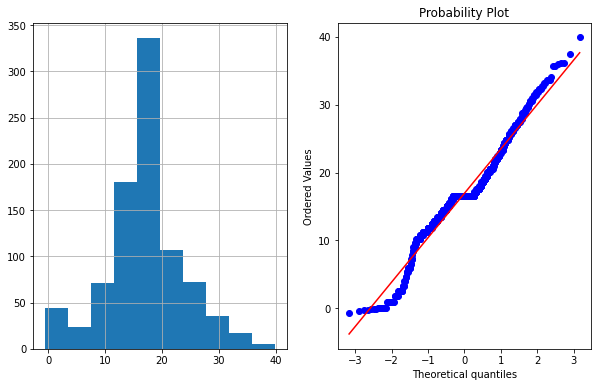

In [79]:
plot_data(df, 'Age_Boxcox')

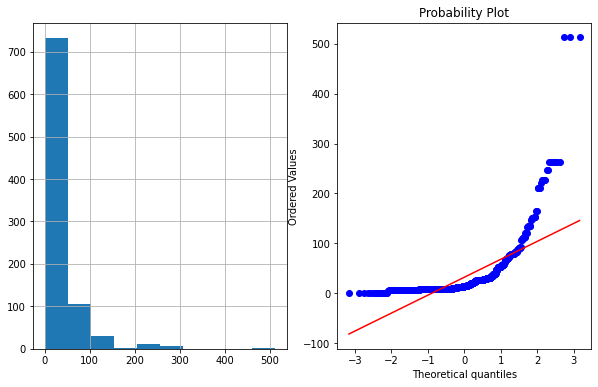

In [80]:
plot_data(df, 'Fare')

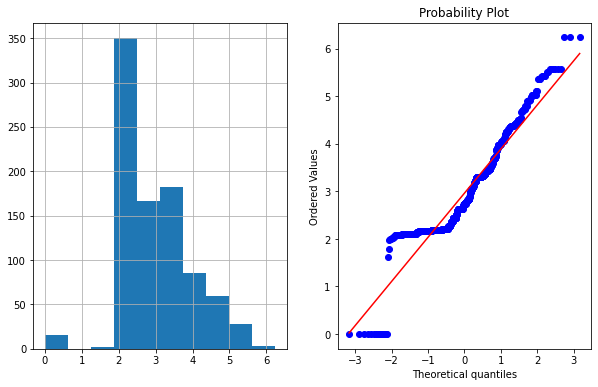

In [81]:
# "Fare":

df['Fare_log'] = np.log1p(df['Fare'])
plot_data(df, 'Fare_log')

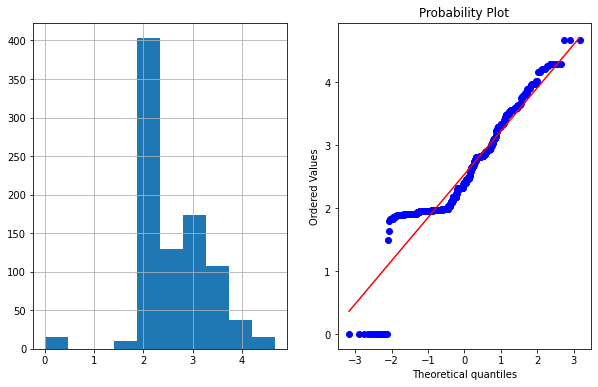

In [82]:
df['Fare_Boxcox'], parameters = stat.boxcox(df['Fare']+1)
plot_data(df, 'Fare_Boxcox')